<a href="https://colab.research.google.com/github/Sinchana258/CLassificationModel-MajorProject/blob/main/Classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!ls runs/detect/ewaste_yolo/weights/


ls: cannot access 'runs/detect/ewaste_yolo/weights/': No such file or directory


In [7]:
!pip install --upgrade ultralytics




  Using cached ultralytics-8.3.202-py3-none-any.whl.metadata (37 kB)
Using cached ultralytics-8.3.202-py3-none-any.whl (1.1 MB)
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.2.0
    Uninstalling ultralytics-8.2.0:
      Successfully uninstalled ultralytics-8.2.0


In [1]:

!pip install  roboflow -q

from ultralytics import YOLO
import torch

print("✅ Torch version:", torch.__version__)
print("✅ CUDA available:", torch.cuda.is_available())

✅ Torch version: 2.8.0+cu126
✅ CUDA available: True


In [2]:
# STEP 2: Connect to Roboflow dataset
from roboflow import Roboflow

# 🔑 Paste your own API key from Roboflow

rf = Roboflow(api_key="DzUpdu4A39ELV7kMcSZy")
project = rf.workspace("sinchana-jqbdj").project("e-waste-classification-pm8bn")
version = project.version(1)
dataset = version.download("yolov8")


print("✅ Dataset downloaded:", dataset.location)

loading Roboflow workspace...
loading Roboflow project...
✅ Dataset downloaded: /content/E-Waste-Classification-1


In [3]:
from ultralytics import YOLO

# Simply load the pre-trained YOLOv8 small model
model = YOLO("yolov8s.pt")

print(model)


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

In [16]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="DzUpdu4A39ELV7kMcSZy")
project = rf.workspace("sinchana-jqbdj").project("e-waste-classification-pm8bn")
version = project.version(3)
dataset = version.download("yolov8")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to E-Waste-Classification-3 in yolov8:: 100%|██████████| 76/76 [00:00<00:00, 4305.45it/s]


In [20]:
!ls /content/E-Waste-Classification-3


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [21]:
!yolo train model=yolov8s.pt data=/content/E-Waste-Classification-3/data.yaml epochs=50 imgsz=640 batch=16 name=ewaste_yolo6


Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/E-Waste-Classification-3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=ewaste_yolo6, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0

In [23]:
!ls /content/runs/detect/ewaste_yolo6/



args.yaml			 labels.jpg	    train_batch81.jpg
BoxF1_curve.png			 results.csv	    train_batch82.jpg
BoxP_curve.png			 results.png	    val_batch0_labels.jpg
BoxPR_curve.png			 train_batch0.jpg   val_batch0_pred.jpg
BoxR_curve.png			 train_batch1.jpg   weights
confusion_matrix_normalized.png  train_batch2.jpg
confusion_matrix.png		 train_batch80.jpg


In [24]:
!ls /content/runs/detect/ewaste_yolo6/weights/


best.pt  last.pt



image 1/1 /content/E-Waste-Classification-3/test/images/Keyboard_26_jpg.rf.cda2abee9a2243b0f2c84402123d9f08.jpg: 640x640 2 Recyclables, 16.2ms
Speed: 1.8ms preprocess, 16.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/E-Waste-Classification-3/test/images/Keyboard_25_jpg.rf.e5e8a169491a0d7039c7bade5b1433f8.jpg: 640x640 2 Recyclables, 16.2ms
Speed: 1.4ms preprocess, 16.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


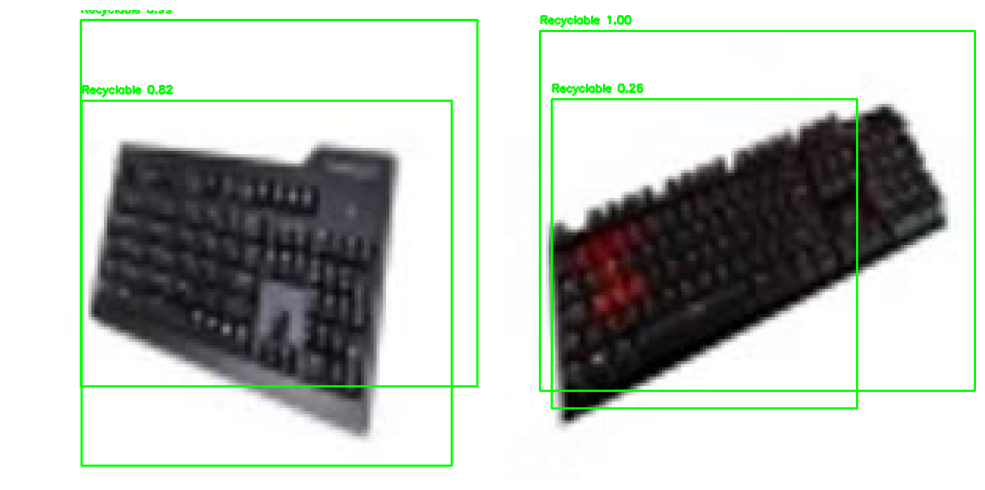

In [27]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# Load your trained model
model = YOLO("/content/runs/detect/ewaste_yolo6/weights/best.pt")

# Paths
test_path = "/content/E-Waste-Classification-3/test/images"
output_path = "/content/runs/detect/predict_annotated"
os.makedirs(output_path, exist_ok=True)

annotated_images = []

# Annotate images
for img_file in os.listdir(test_path):
    if img_file.endswith(('.jpg', '.png')):
        img_path = os.path.join(test_path, img_file)
        results = model.predict(source=img_path, save=False)

        # Load original image
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

        for result in results:
            boxes = result.boxes
            for box in boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                conf = box.conf[0].item()
                cls_id = int(box.cls[0].item())
                label = f"{model.names[cls_id]} {conf:.2f}"

                # Draw rectangle
                cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(img, label, (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Save annotated image
        annotated_img_path = os.path.join(output_path, img_file)
        cv2.imwrite(annotated_img_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
        annotated_images.append(img)

# Display images in a grid
cols = 3
rows = (len(annotated_images) + cols - 1) // cols
plt.figure(figsize=(15, 5 * rows))

for i, img in enumerate(annotated_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()
plt.show()
